# Scored Images Combiner

In [10]:
import os
import shutil

# The top directory
top_dir = './'  # use the directory we want to start from here

# The destination directory
dest_dir = 'combined_scored_images'

# Create the destination directory if it doesn't exist
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Initialize the counter
count = 0

# Walk through each directory
for dirpath, dirnames, filenames in os.walk(top_dir):
    # If this directory contains a directory named 'scored_images'
    if 'scored_images' in dirnames:
        # The path to the 'scored_images' directory
        path = os.path.join(dirpath, 'scored_images')
        
        # Get the list of files in the directory
        files = os.listdir(path)
        
        # Iterate through each file
        for file in files:
            # Check if the file is an image
            if file.endswith('.jpg'):
                # Create a path to the file
                src_path = os.path.join(path, file)
                
                # Create a path to the destination
                dst_path = os.path.join(dest_dir, file)
                
                # Copy the file to the destination
                shutil.copy(src_path, dst_path)
                
                # Increment the counter
                count += 1

print("Total jpg files copied: ", count)


Total jpg files copied:  4748


In [1]:
import os
import pandas as pd

# The directory containing the images
dir_name = 'combined_scored_images'

# Get a list of all filenames in the directory
filenames = os.listdir(dir_name)

# Initialize an empty list to store the scores
scores = []

# Iterate through each filename
for filename in filenames:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Extract the score (the first three characters of the filename)
        score = filename[:3]
        
        # Add the score to the list
        scores.append({'score': score})

# Convert the list to a DataFrame
scores_df = pd.DataFrame(scores)

# Print the DataFrame
print(scores_df)


     score
0      540
1      427
2      450
3      577
4      574
...    ...
4833   497
4834   404
4835   447
4836   590
4837   737

[4838 rows x 1 columns]


In [2]:
# The directory containing the images
dir_name = 'combined_scored_images'

# Get a list of all filenames in the directory
filenames = os.listdir(dir_name)

# Initialize an empty list to store the data
data = []

# Iterate through each filename
for filename in filenames:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Extract the score (the first three characters of the filename)
        score = filename[:3]
        # Extract the locationID (the second part when split by underscores)
        locationID = filename.split('_')[1]
        # Extract the carcassID (the third part when split by underscores, without the '.jpg' at the end)
        carcassID = filename.split('_')[2][:-4]
        # Add the data to the list
        data.append({'score': score, 'locationID': locationID, 'carcassID': carcassID})

# Convert the list to a DataFrame
scores_df = pd.DataFrame(data)

# Print the DataFrame
print(scores_df)

     score locationID carcassID
0      540        ND2      1174
1      427       CDP1       230
2      450        TL2      7594
3      577        TL1      7669
4      574       CFM3  132758-1
...    ...        ...       ...
4833   497       CFM2  102856-2
4834   404        ND1       119
4835   447        TL3       300
4836   590        CS1  310497-2
4837   737        New       321

[4838 rows x 3 columns]


In [3]:
# Convert scores to integer type
scores_df['score'] = scores_df['score'].astype(int)

# Define the bins for the categories
bins = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]
labels = ['Practically devoid – USDA Standard', 'Devoid – USDA Standard', 'Slight – USDA Select', 
          'Small - USDA Choice', 'Modest – USDA Choice', 'Moderate – USDA Choice', 
          'Slightly abundant – USDA Prime', 'Moderately abundant – USDA Prime', 
          'Abundant – USDA Prime', 'Very abundant – USDA Prime']

# Categorize scores into quality grades
scores_df['grade'] = pd.cut(scores_df['score'], bins=bins, labels=labels)

# Print count of each grade
print("Counts:")
print(scores_df['grade'].value_counts())

# Print proportions of each grade
print("\nProportions:")
print(scores_df['grade'].value_counts(normalize=True))

# Mean score for each grade
print("\nMean Score:")
for label in labels:
    mean_score = scores_df[scores_df['grade'] == label]['score'].mean()
    print(f"{label}: {round(mean_score, 2)}")  # round to 2 decimal places

# Score distribution in each grade
print("\nScore Distribution:")
for label in labels:
    distribution = scores_df[scores_df['grade'] == label]['score'].describe()
    distribution = distribution.round(2)  # round to 2 decimal places
    print(f"{label}: {distribution}")

# Minimum and Maximum score in each grade
print("\nMin and Max Score:")
for label in labels:
    min_score = scores_df[scores_df['grade'] == label]['score'].min()
    max_score = scores_df[scores_df['grade'] == label]['score'].max()
    print(f"{label}: Min-{min_score}, Max-{max_score}")


Counts:
grade
Small - USDA Choice                   2023
Modest – USDA Choice                  1154
Slight – USDA Select                   821
Moderate – USDA Choice                 473
Slightly abundant – USDA Prime         261
Moderately abundant – USDA Prime        64
Devoid – USDA Standard                  16
Practically devoid – USDA Standard      10
Abundant – USDA Prime                   10
Very abundant – USDA Prime               0
Name: count, dtype: int64

Proportions:
grade
Small - USDA Choice                   0.418667
Modest – USDA Choice                  0.238825
Slight – USDA Select                  0.169909
Moderate – USDA Choice                0.097889
Slightly abundant – USDA Prime        0.054015
Moderately abundant – USDA Prime      0.013245
Devoid – USDA Standard                0.003311
Practically devoid – USDA Standard    0.002070
Abundant – USDA Prime                 0.002070
Very abundant – USDA Prime            0.000000
Name: proportion, dtype: float64

Mean S

## Descriptive Statistics: 

In addition to the mean, median, and mode that we've already computed, we might also be interested in the standard deviation (which tells we how spread out the scores are around the mean), the range (the difference between the highest and lowest score), or the quartiles (which divide the scores into four equal parts).

In [4]:
import numpy as np

# Convert scores to integer type
scores_df['score'] = scores_df['score'].astype(int)

# Define the bins for the categories
bins = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]
labels = ['Practically devoid – USDA Standard', 'Devoid – USDA Standard', 'Slight – USDA Select', 
          'Small - USDA Choice', 'Modest – USDA Choice', 'Moderate – USDA Choice', 
          'Slightly abundant – USDA Prime', 'Moderately abundant – USDA Prime', 
          'Abundant – USDA Prime', 'Very abundant – USDA Prime']

# Categorize scores into quality grades
scores_df['grade'] = pd.cut(scores_df['score'], bins=bins, labels=labels)

# Print count of each grade
print("Counts:")
print(scores_df['grade'].value_counts())

# Print proportions of each grade
print("\nProportions:")
print(scores_df['grade'].value_counts(normalize=True))

# Mean, Median, Mode, Standard Deviation, Range, and Quartiles for each grade
print("\nStatistics:")
for label in labels:
    grade_scores = scores_df[scores_df['grade'] == label]['score']
    mean_score = np.mean(grade_scores)
    median_score = np.median(grade_scores)
    mode_score = grade_scores.mode()[0] if not grade_scores.mode().empty else None
    std_dev = np.std(grade_scores)
    score_range = np.ptp(grade_scores) if not grade_scores.empty else None
    quartiles = np.percentile(grade_scores, [25, 50, 75]) if not grade_scores.empty else None
    
    print(f"{label}:")
    print(f"  Mean: {round(mean_score, 2)}")
    print(f"  Median: {median_score}")
    print(f"  Mode: {mode_score}")
    print(f"  Standard Deviation: {round(std_dev, 2)}")
    print(f"  Range: {score_range}")
    print(f"  Quartiles: {quartiles}")


Counts:
grade
Small - USDA Choice                   2023
Modest – USDA Choice                  1154
Slight – USDA Select                   821
Moderate – USDA Choice                 473
Slightly abundant – USDA Prime         261
Moderately abundant – USDA Prime        64
Devoid – USDA Standard                  16
Practically devoid – USDA Standard      10
Abundant – USDA Prime                   10
Very abundant – USDA Prime               0
Name: count, dtype: int64

Proportions:
grade
Small - USDA Choice                   0.418667
Modest – USDA Choice                  0.238825
Slight – USDA Select                  0.169909
Moderate – USDA Choice                0.097889
Slightly abundant – USDA Prime        0.054015
Moderately abundant – USDA Prime      0.013245
Devoid – USDA Standard                0.003311
Practically devoid – USDA Standard    0.002070
Abundant – USDA Prime                 0.002070
Very abundant – USDA Prime            0.000000
Name: proportion, dtype: float64

Statis

/usr/local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


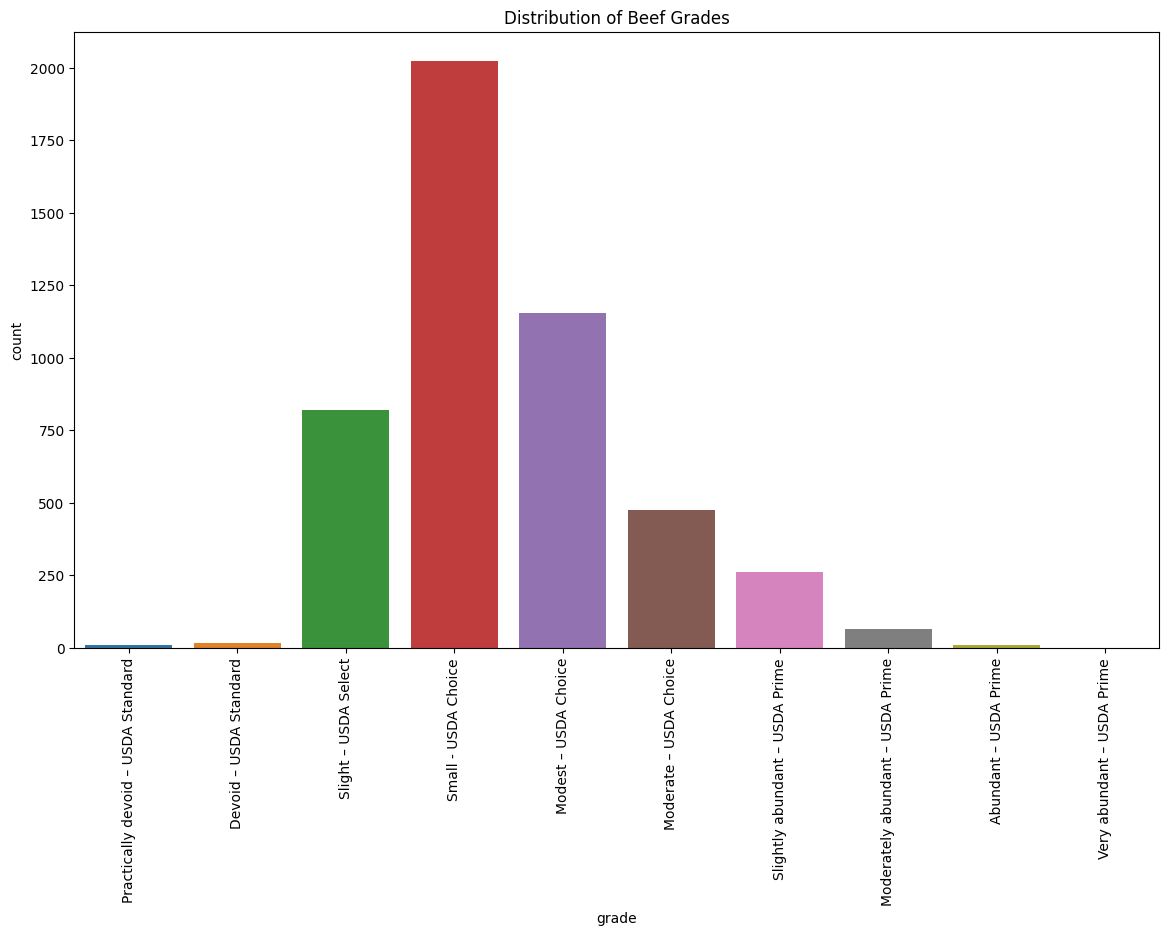

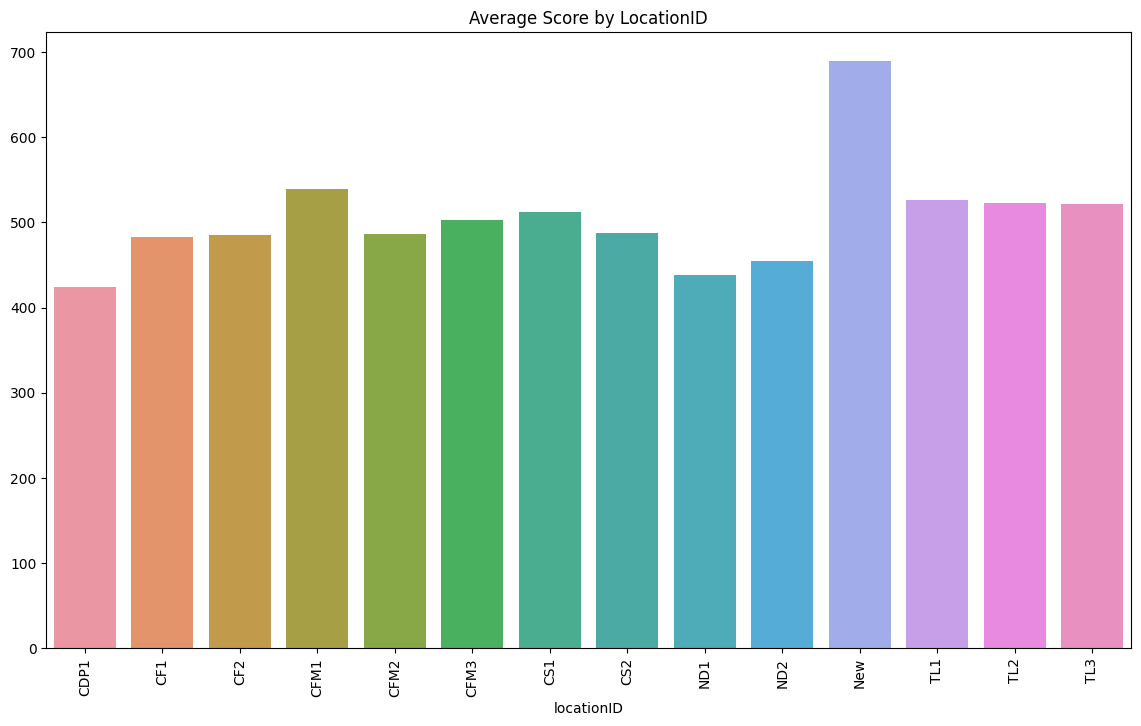

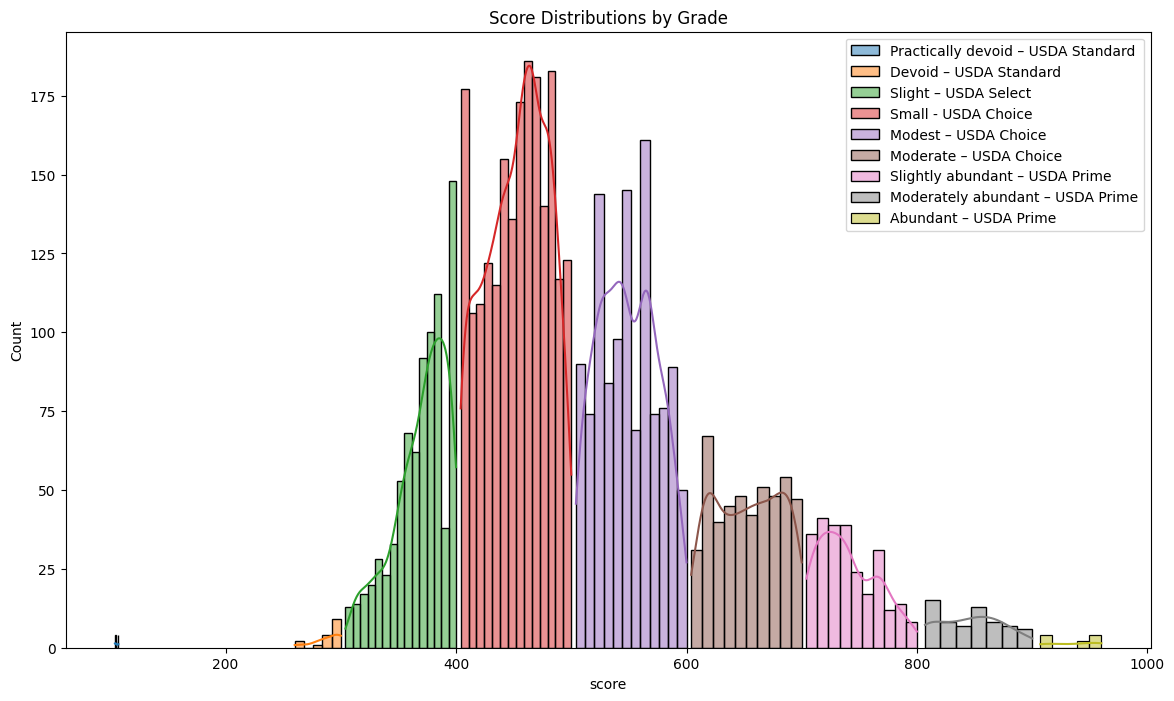

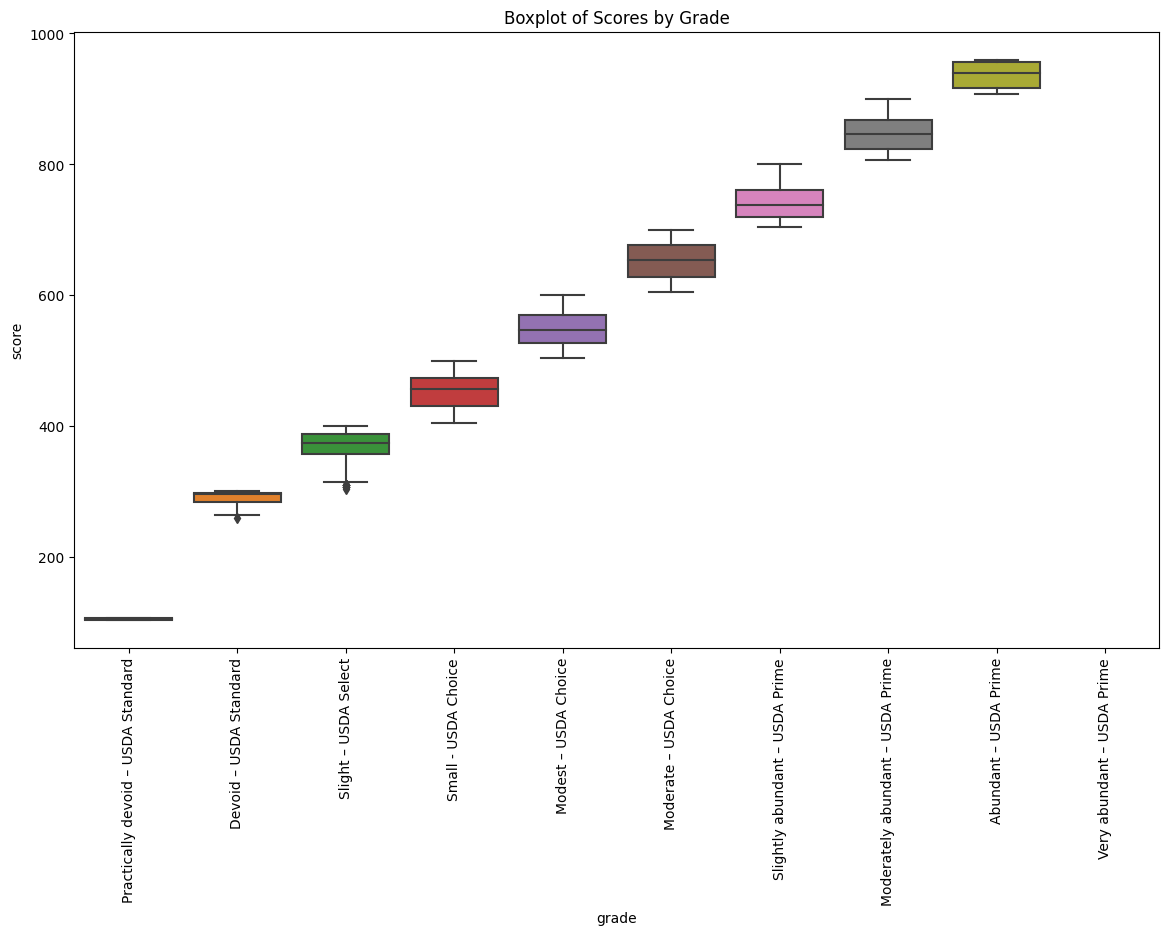

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Practically devoid – USDA Standard', 'Devoid – USDA Standard', 'Slight – USDA Select', 
          'Small - USDA Choice', 'Modest – USDA Choice', 'Moderate – USDA Choice', 
          'Slightly abundant – USDA Prime', 'Moderately abundant – USDA Prime', 
          'Abundant – USDA Prime', 'Very abundant – USDA Prime']

# Distribution of Grades
plt.figure(figsize=(14, 8))
sns.countplot(x='grade', data=scores_df, order=labels)
plt.title('Distribution of Beef Grades')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

# Average Score by LocationID
average_scores_by_location = scores_df.groupby('locationID')['score'].mean()
plt.figure(figsize=(14, 8))
sns.barplot(x=average_scores_by_location.index, y=average_scores_by_location.values)
plt.title('Average Score by LocationID')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

# Distribution of Scores by Grade
plt.figure(figsize=(14, 8))
for label in labels:
    sns.histplot(scores_df[scores_df['grade'] == label]['score'], kde=True, label=label)
plt.title('Score Distributions by Grade')
plt.legend()
plt.show()

# Boxplot of Scores by Grade
plt.figure(figsize=(14, 8))
sns.boxplot(x='grade', y='score', data=scores_df, order=labels)
plt.title('Boxplot of Scores by Grade')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


- CDP1 = Cargill Dodge 07 20 22 Plant
- CDP1 = Cargill Dodge 07 20 22 USDA
- CFM1 = Cargill Fort Morgan 03 28 22 Plant
- CFM2 = Cargill Fort Morgan 05 12 22 Plant
- CFM3 = Cargill Fort Morgan 07 15 22 Plant
- CF1 = Cargill Friona 07 18 22 Plant
- CF2 = Cargill Friona 07 18 22 USDA
- CS1 = Cargill Schuyler 04 01 22 Plant
- CS2 = Cargill Schuyler 07 18 22 Plant
- ND1 = National Dodge 07 19 22 USDA
- ND2 = National Liberal 07 19 22 USDA
- TL1 = Tyson Lexington 03 23 21 Plant 1st camera
- TL2 = Tyson Lexington 03 23 21 Plant 2nd camera
- TL3 = Tyson Lexington 06 27 22 USDA

In [6]:
print(scores_df['score'].describe())

count    4838.000000
mean      501.266846
std       114.467684
min       100.000000
25%       424.000000
50%       477.000000
75%       560.000000
max       960.000000
Name: score, dtype: float64


## Score Variability by Grade: 

Compute the variance or standard deviation of scores within each grade. This could help we understand how consistent the scoring is within each grade.

In [7]:
print(scores_df.groupby('grade')['score'].std())

grade
Practically devoid – USDA Standard     1.429841
Devoid – USDA Standard                12.841177
Slight – USDA Select                  23.277632
Small - USDA Choice                   26.529309
Modest – USDA Choice                  25.457828
Moderate – USDA Choice                28.587199
Slightly abundant – USDA Prime        25.683871
Moderately abundant – USDA Prime      27.990924
Abundant – USDA Prime                 22.285022
Very abundant – USDA Prime                  NaN
Name: score, dtype: float64


In [12]:
scores_df

,score,locationID,carcassID,grade
0,540,ND2,1174,Modest – USDA Choice
1,427,CDP1,230,Small - USDA Choice
2,450,TL2,7594,Small - USDA Choice
3,577,TL1,7669,Modest – USDA Choice
4,574,CFM3,132758-1,Modest – USDA Choice
...,...,...,...,...
4833,497,CFM2,102856-2,Small - USDA Choice
4834,404,ND1,119,Small - USDA Choice
4835,447,TL3,300,Small - USDA Choice
4836,590,CS1,310497-2,Modest – USDA Choice


# Write to new dataset

In [9]:
# write the newly created dataset to a csv file
scores_df.to_csv("scores_dataset2.csv", index=False)


# Conduct further Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of visualizing and analyzing data to extract insights, find patterns, identify outliers, test assumptions, and check for random chance. Here are some interesting exploratory data analysis we can perform on our beef grade data:

1. **Distribution of Scores by Location:** We've already plotted the average score by location, but it might be interesting to look at the distribution of scores by location. You can use boxplots or histograms to do this.

2. **Number of Grades by Location:** We can find out the count of each grade in every location. This can give we insights into how grading varies between locations.

3. **Grade versus Score Correlation by Location:** Since our dataset has both scores and their corresponding grades, we could see if the grades and scores follow a particular pattern for each location. This could involve creating scatter plots of scores versus grades for each location.

4. **Outlier Detection:** We can look for any outliers in our scores and grades. Box plots, scatter plots, or even a z-score analysis can help with this. Outliers might represent errors, but they could also be significant and interesting results.

5. **Time Trend Analysis:** If our data has a time component (like the date of grading), we could analyze trends over time. Are scores and grades improving or getting worse? Are there seasonal trends?

6. **Association Rules:** If we have more features, for instance, the feed type or the breed of the cattle, we could use association rules to find out if there are any interesting relationships. For example, does a certain breed or feed type have a higher probability of achieving a particular grade?

Remember, the goal of EDA is to understand the data and its underlying structure, not to build models or make predictions. 


# Building a model

Building a model requires a dataset with multiple features (or independent variables) and a target (or dependent variable). From the given information, our dataset primarily consists of scores, locations, and the derived grade. 

We can certainly build a model based on these features if we have a specific goal in mind. Here are a few possibilities:

1. **Predicting the Grade:** If we want to predict the beef grade based on the score, we could use a classification model, since the grades are discrete categories. However, since the grade is directly derived from the score in our case, it might not be a very interesting or useful model.

2. **Predicting the Score:** If we have more data about each carcass (like its weight, age, breed, feed type, etc.), we could build a regression model to predict the score based on these factors.

3. **Location Analysis:** If we have more data related to locations (like the number of cattle, the type of facilities, the age of the facilities, etc.), we could analyze how these factors affect the score or grade.

4. **Time Series Prediction:** If we have time-series data (like the date when each carcass was graded), we could predict future scores or grades using time-series models like ARIMA or LSTM.

However, given our current dataset, it's quite limited to provide a meaningful model. Gathering more features about each carcass would enable more possibilities for model building. 

# standardizing the image size

This script iterates over every image in we  directory, opens it, and updates IMG_SIZE to be the smaller of the image's dimensions if it's less than the current IMG_SIZE.

However, it's important to note that while this method ensures that IMG_SIZE will be small enough for all we  images, it also means that IMG_SIZE is determined by the smallest image in we  dataset. If that image is an outlier (i.e., significantly smaller than the rest), it might not be the most efficient size to use for training we  model.

Another approach is to resize all we  images to a standard size as part of we  preprocessing pipeline. This would allow weto control IMG_SIZE more directly and ensure that it's appropriate for we  model and computational resources.

In [10]:
import os
from PIL import Image

# The directory containing the images
dir_name = 'combined_scored_images'

# Get a list of all filenames in the directory
filenames = os.listdir(dir_name)

# Initialize IMG_SIZE with a very large number
IMG_SIZE = float('inf')

# Iterate through each filename
for filename in filenames:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Open the image file
        with Image.open(os.path.join(dir_name, filename)) as img:
            width, height = img.size
            # Set IMG_SIZE to the smaller of the two dimensions if it's less than the current IMG_SIZE
            IMG_SIZE = min(IMG_SIZE, width, height)

print(f"IMG_SIZE: {IMG_SIZE}")


IMG_SIZE: 422


In [11]:
# This code demonstrates the overall process of defining, compiling, and training a deep learning model 
# for image classification using TensorFlow's Keras API. The model uses a simple architecture with 
# two convolutional layers each followed by max pooling, and a final dense layer for classification. 
# The training and validation data are provided by a custom generator function, which allows for 
# flexible and memory-efficient handling of data. The script doesn't include parts about model 
# evaluation, improvement or deployment as they would typically be in a different part of the project.


# Import necessary modules and libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Constants for image size, batch size, and number of epochs
IMG_SIZE = 422  # the size of images to be fed into the model, presumably resized to 422x422
BATCH_SIZE = 32  # the number of images processed at one time during training
EPOCHS = 10  # the number of times the model will cycle through the entire dataset during training

# Directory containing the dataset
dir_name = 'combined_scored_images'

# Define the model architecture
model = Sequential()  # initializing a sequential model
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))  # Conv2D layer with 32 filters, kernel size 3, activation function ReLU, and expected input shape
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling layer for spatial downsampling
model.add(Conv2D(64, kernel_size=3, activation='relu'))  # second Conv2D layer with 64 filters
model.add(MaxPooling2D(pool_size=(2, 2)))  # second MaxPooling layer
model.add(Flatten())  # flattening the tensor output from previous layer for input to the dense layer
model.add(Dense(10, activation='softmax'))  # final Dense layer, the output layer. It has 10 neurons corresponding to 10 classes, uses softmax activation function for multi-class classification

# Compiling the model with Adam optimizer, categorical crossentropy loss (since this is a multi-class classification problem), and accuracy as the metric to be evaluated during training and testing
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Custom generator function to load, preprocess and batch the image data for training and validation
def custom_generator(subset):
    while True:
        # Selecting training or validation subset
        if subset == 'training':
            files = os.listdir(dir_name)[:int(0.8 * len(os.listdir(dir_name)))]  # first 80% of files for training
        elif subset == 'validation':
            files = os.listdir(dir_name)[int(0.8 * len(os.listdir(dir_name))):]  # last 20% of files for validation
            
        batch_images = []
        batch_labels = []

        for filename in files:
            if filename.endswith('.jpg'):
                # Extracting score from filename and converting to one-hot encoded label
                score = int(filename[:3])
                label = [0]*10
                label[score//100 - 1] = 1
                
                # Loading image and resizing to IMG_SIZE
                img = tf.keras.preprocessing.image.load_img(dir_name + '/' + filename, target_size=(IMG_SIZE, IMG_SIZE))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                
                # Adding image and label to batch lists
                batch_images.append(img_array)
                batch_labels.append(label)
                
                # If batch is of required size, yield the batch data and reset batch lists
                if len(batch_images) == BATCH_SIZE:
                    yield (np.array(batch_images), np.array(batch_labels))
                    batch_images = []
                    batch_labels = []

# Number of images in the dataset
num_images = len(os.listdir(dir_name))

# Calculate the number of steps per epoch for training and validation
steps_per_epoch = int(0.8 * num_images) // BATCH_SIZE
validation_steps = int(0.2 * num_images) // BATCH_SIZE

# Train the model using the custom generator for both training data and validation data
model.fit(custom_generator('training'), epochs=EPOCHS, 
          steps_per_epoch=steps_per_epoch,
          validation_data=custom_generator('validation'), 
          validation_steps=validation_steps)

model.save('my_new_10_epoch_model')  # save model to folder

2023-08-29 04:00:03.587299: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10


2023-08-29 04:00:06.466113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


121/121 [==============================] - ETA: 0s - loss: 206.7660 - accuracy: 0.3386

2023-08-29 04:03:12.563363: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


121/121 [==============================] - 199s 2s/step - loss: 206.7660 - accuracy: 0.3386 - val_loss: 1.5778 - val_accuracy: 0.3979
Epoch 2/10
121/121 [==============================] - 204s 2s/step - loss: 1.3599 - accuracy: 0.4848 - val_loss: 1.6624 - val_accuracy: 0.3698
Epoch 3/10
121/121 [==============================] - 210s 2s/step - loss: 1.0879 - accuracy: 0.5992 - val_loss: 1.7044 - val_accuracy: 0.3438
Epoch 4/10
121/121 [==============================] - 217s 2s/step - loss: 0.8123 - accuracy: 0.7056 - val_loss: 1.8021 - val_accuracy: 0.3594
Epoch 5/10
121/121 [==============================] - 223s 2s/step - loss: 0.6466 - accuracy: 0.7802 - val_loss: 2.9866 - val_accuracy: 0.3396
Epoch 6/10
121/121 [==============================] - 218s 2s/step - loss: 0.4390 - accuracy: 0.8528 - val_loss: 4.3764 - val_accuracy: 0.3292
Epoch 7/10
121/121 [==============================] - 219s 2s/step - loss: 0.3533 - accuracy: 0.8853 - val_loss: 3.1665 - val_accuracy: 0.2896
Epoch 8/

INFO:tensorflow:Assets written to: my_new_10_epoch_model/assets


INFO:tensorflow:Assets written to: my_new_10_epoch_model/assets


The output we are seeing is the training progress and results of we  image classification model for each epoch (iteration through the entire dataset). Let's break it down:

- Each `Epoch` line signifies a single pass through the entire training set. Our model was set to run for 10 epochs.

- The format `118/118 [==============================]` signifies the completion of training steps in that particular epoch. Here, we had 118 steps per epoch and all are completed as shown by the filled brackets.

- `loss` and `accuracy` are metrics calculated on the training dataset. Loss is a measure of error and accuracy is the proportion of correctly classified images. Ideally, we want the loss to go down and accuracy to go up with each epoch. From the first to the ninth epoch, loss reduced from 121.4189 to 0.3933 and accuracy increased from 0.3665 to 0.8610, indicating the model is learning.

- `val_loss` and `val_accuracy` are the same metrics but calculated on the validation dataset, a subset of the data not used for training. The purpose of these metrics is to see how well the model is generalizing to new data. Ideally, validation loss should decrease and validation accuracy increase, similar to the training metrics. However, in we  output, validation loss is increasing and validation accuracy is not consistently improving, suggesting the model may be overfitting the training data.

- The numbers after `ETA` and before the next Epoch represent the time taken to complete that epoch. The model took varying amounts of time, from a few minutes (173 seconds) to over half an hour (1666 seconds), to complete each epoch.

- The `INVALID_ARGUMENT` messages suggest there's an issue with feeding data to the model. It's not directly affecting the training process here but ideally, weshould look into this to avoid potential issues.

Keep in mind, the results are specific to this run of the model and can vary if the model is re-run or parameters are changed.

Model Creation Steps in a little more detail:

1. `model = Sequential()`: The Sequential model is a linear stack of layers. You can create a Sequential model by passing a list of layer instances to the constructor, or by simply adding layers via the `.add()` method. It is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

```bash
Input Layer
     |
Conv2D Layer
     |
MaxPooling2D Layer
     |
Conv2D Layer
     |
MaxPooling2D Layer
     |
Flatten Layer
     |
Dense Layer (Output Layer)
```

In this structure, the input flows from the top (Input Layer) and gets transformed as it passes through each layer. The transformations are determined by the weights of each layer, which are learned during the training phase. Each layer except for the input layer has one input - the output of the previous layer - and one output, which becomes the input for the next layer. The final output of the model is the output of the last layer (Output Layer).

So, if you think of the Sequential model as a list, then each item in the list is a layer, and data flows linearly from the first item (layer) in the list to the last.


2. `model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))`: This line adds a 2D convolutional layer to the model. This type of layer is often used at the beginning of deep learning models to extract features from input images. This layer will take the input image, defined by `input_shape=(IMG_SIZE, IMG_SIZE, 3)`, and convolve it with 32 kernels (or filters) of size 3x3 (specified by `kernel_size=3`). The activation function is the Rectified Linear Unit (ReLU), which is a common choice in deep learning models.

**What is the Rectified Linear Unit (ReLU) and how is it being implemented here?**

The Rectified Linear Unit (ReLU) is an activation function, which is used in a neural network to introduce non-linearity into the model. Without an activation function, no matter how many layers the neural network has, it would still behave like a single-layer perceptron because summing these layers would give you another linear function.

The ReLU function is defined as $f(x) = \max(0, x)$

In simple terms, if the input is greater than 0, it outputs the input value itself, and if the input is less than or equal to 0, it outputs 0.

ReLU is popular because it helps mitigate the vanishing gradients problem, which is where gradients become too small to effectively train the network. This occurs with traditional activation functions like the sigmoid or hyperbolic tangent functions, which squish their input data into a very small range (usually between -1 and 1 or 0 and 1). This squishing effect can make the derivatives extremely small, especially when dealing with deep neural networks. ReLU does not squish values between a certain range and its derivative is 1 for all positive values, which means it doesn’t suffer from small derivative values.

In our code, ReLU is being implemented as the activation function for our Conv2D layers:

```python
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))  
model.add(Conv2D(64, kernel_size=3, activation='relu'))  
```

Here, `activation='relu'` is setting ReLU as the activation function for these layers. After each convolution operation, the output feature map will be passed through the ReLU function before being passed to the next layer. This will introduce non-linearity to the learning process, allowing your model to learn more complex patterns in the data.

3. `model.add(MaxPooling2D(pool_size=(2, 2)))`: A max pooling 2D layer is added next. Pooling layers are used to downsample the image, reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned. This is done to reduce overfitting and improve computational efficiency. The max pooling operation takes the maximum value over a 2x2 patch (as specified by `pool_size=(2, 2)`) in the input data.

4. `model.add(Conv2D(64, kernel_size=3, activation='relu'))`: Another 2D convolutional layer is added with the same kernel size as before, but with twice the number of filters. Increasing the number of filters allows the model to learn more complex representations.

5. `model.add(MaxPooling2D(pool_size=(2, 2)))`: Another max pooling 2D layer is added, again with a 2x2 pool size. This continues the process of downsampling the image representations and reducing computational complexity in the subsequent layers.

6. `model.add(Flatten())`: A flattening layer is used here to convert the 2D image data into 1D, which allows it to be fed into the following fully connected (Dense) layer. 

7. `model.add(Dense(10, activation='softmax'))`: This is the output layer of the model. It is a fully connected layer, meaning it takes all the outputs from the previous layer and weighs them to produce its output. The number of neurons in this layer (10) should match the number of classes in the classification problem. The softmax activation function ensures the output values are in the range (0, 1) and sum to 1, making them usable as probabilities for each class.

Deploying a TensorFlow model on Google Cloud involves a few steps:

1. **Export Your Trained Model**: TensorFlow uses the `SavedModel` format for its exportable and servable models. Once your model is trained, you can save it in this format using the `model.save` method:

   ```python
   model.save('my_10_epoch_model')  # save model to folder
   
   ```
</br>

2. **Upload the Model to Google Cloud Storage (GCS)**: Before deploying, you need to upload your saved model to a GCS bucket. You'll first have to create a bucket (if you haven't already) in the GCS console. Once created, use the following `gsutil` command to copy your SavedModel to the bucket:

   ```bash
   gsutil cp -r my_10_epoch_model gs://my-bucket  
   ```
</br>

3. **Create a Model Resource in AI Platform**: In the AI Platform, a Model resource is a container for different versions of your machine learning model. You can create a Model resource from the Google Cloud Console or using the `gcloud` CLI.

   ```bash
   gcloud ai-platform models create my_10_epoch_model --regions us-east1 
   ```
</br>

4. **Create a Model Version in AI Platform**: Once the Model resource is set up, create a Version of the model by specifying the GCS path to the SavedModel. Each Version corresponds to a specific instance of your model hosted in the cloud.

   ```bash
   gcloud ai-platform versions create my_10_epoch_model \
   --model my_10_epoch_model \
   --origin gs://my-bucket/my_10_epoch_model \
   --runtime-version 2.5 \  # match the TensorFlow version used during training
   --python-version 3.7 \   # match the Python version used during training
   --framework 'TENSORFLOW' \
   --machine-type n1-standard
   ```

note: The machine type you choose to serve your model depends on the specific requirements of your model, such as the memory and CPU needed. Google Cloud offers a range of machine types you can use:

1. `n1-standard`: Offers a balance of compute power and memory, useful for general-purpose workloads.
2. `n1-highmem`: Provides high memory, suitable for memory-intensive applications.
3. `n1-highcpu`: Provides high CPU power, good for compute-intensive applications.

For a machine learning model, you might want to start with a `n1-standard` type. A `n1-standard-4` (with 4 vCPUs and 15 GB of memory) could be a reasonable starting point.

Remember, the choice of machine type may affect the cost. It's usually recommended to start with a smaller machine type and scale up if needed, especially if you're unsure about the resource requirements of your model. You should also monitor your model's resource usage to make sure the machine type you've chosen is a good fit.

</br>


5. **Send Prediction Requests**: With your model deployed, you can now make online predictions by sending HTTP requests to AI Platform. You can also make batch predictions if you have large amounts of data to process.

This process will allow you to use Google's infrastructure to serve your model, allowing you to scale and manage your models effectively.

We can deploy we  trained model on AWS using Amazon SageMaker. SageMaker allows we to host models and make predictions in the cloud.

To do so, we first need to save we  trained model in the TensorFlow SavedModel format, which creates a protobuf file in a well-defined directory hierarchy, and also saves the TensorFlow checkpoint files. Here's how we do it:

In [13]:
# save the model in TensorFlow SavedModel format
model.save('my_10_epoch_model')


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [13]:
# use this to load the model back into the notebook

import tensorflow as tf

# Load the model from the directory it was saved in
model = tf.keras.models.load_model('my_model')

# Now we can use loaded_model to make predictions, just like the original model


This creates a directory named my_model and stores the model there.

Next, we would need to upload this model to an S3 bucket:

In [14]:
#import boto3
#import sagemaker

#sagemaker_session = sagemaker.Session()

#bucket = sagemaker_session.default_bucket()  # replace with we  own bucket name if not using the default
#prefix = 'sagemaker/my_model'  # replace 'my_model' with we  own preferred name

#model_artifact = sagemaker_session.upload_data(path='my_model', bucket=bucket, key_prefix=prefix)

#print('Model artifact saved at:', model_artifact)


You can now create a SageMaker model from the model artifact:

In [15]:
#from sagemaker.tensorflow import TensorFlowModel

#role = sagemaker.get_execution_role()  # replace with we  own IAM role if not using the SageMaker default role

#sagemaker_model = TensorFlowModel(model_data=model_artifact, role=role, framework_version='2.1.0')


And finally, deploy this model to an endpoint:

In [16]:
# predictor = sagemaker_model.deploy(initial_instance_count=1, instance_type='ml.m5.large')


Now, we can use this predictor to make real-time predictions.

In [17]:
# Assume input_data is we  input for prediction in the appropriate format
# result = predictor.predict(input_data)


Remember to replace 'ml.m5.large' with we  preferred instance type based on we  model's resource requirements and cost considerations.

Please note that we would need appropriate permissions for SageMaker to perform these operations. Also, be aware that hosting endpoints on SageMaker incurs cost for as long as they are running, so remember to shut them down when not in use.

In [18]:
# delete the endpoint when you're done
#predictor.delete_endpoint()


## The Model

The model is a type of convolutional neural network (CNN) that is typically used in image classification tasks.

Let's break down each line:

```python
# Define our model
model = Sequential()
```

The Sequential model is a linear stack of layers that we can create by passing a list of layer instances to the constructor. This means that we can create a CNN in a "stack-like" manner, where we first instantiate a Sequential model and then add layers to it one by one in a sequence.

```python
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
```

The first layer is a 2D convolution layer (Conv2D). This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. The first argument passed (32) is the number of filters that the convolutional layers will learn from. The kernel_size parameter denotes the height and width of the 2D convolution window. The activation function is 'relu' or rectified linear activation. The input_shape is the shape of the input (in this case, images).

```python
model.add(MaxPooling2D(pool_size=(2, 2)))
```

The max pooling layer (MaxPooling2D) is used to down-sample the input along its spatial dimensions (height and width). This reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation.

```python
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
```

Here, another convolutional layer and max pooling layer are added to the model. The first layer has 64 filters.

```python
model.add(Flatten())
```

This layer flattens the tensor output of the previous layer to a 1D tensor. This flattened output is fed to the next layer.

```python
model.add(Dense(10, activation='softmax'))  # Adjust number of neurons in final layer if necessary
```

The dense layer is the regular deeply connected neural network layer. It's most common and frequently used layer. Dense layer does the below operation on the input and returns the output.

`output = activation(dot(input, kernel) + bias)`

The first argument is the output size. In this case, we are using 10, which should match the number of classes in the classification task. The activation function used here is 'softmax', which makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

```python
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```

The model is compiled with the Adam optimizer, a popular choice for training deep learning models. The loss function is set as 'categorical_crossentropy', which is appropriate for multiclass classification problems. The metrics to be evaluated by the model during training and testing are set as 'accuracy'.

The model is then trained using the fit method on the data generator. The data generator generates batches of tensor image data with real-time data augmentation. The data will be looped over in batches indefinitely.

During training, the model's weights are updated to minimize the loss function, and the accuracy of the classification is calculated as the percentage of correct predictions out of all predictions. These two values (loss and accuracy) are calculated for both the training data and the validation data.

After the model has been trained, it can be used to predict the class of unseen



## Let's take 100 random test images

Let's copy 100 random images and put into our test_images folder and then we'll see how well our classifier identifies the images correctly.



In [21]:
import os
import shutil
import random

# The source directory containing the images
source_dir = 'combined_scored_images'
# The destination directory
dest_dir = 'test_images'

# Create the destination directory if it doesn't exist
os.makedirs(dest_dir, exist_ok=True)

# Get a list of all filenames in the source directory
filenames = os.listdir(source_dir)

# Randomly choose 100 files
selected_files = random.sample(filenames, 100)

# Move the selected files to the destination directory
for filename in selected_files:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Construct the full file paths
        src_filepath = os.path.join(source_dir, filename)
        dest_filepath = os.path.join(dest_dir, filename)
        # Move the file
        shutil.move(src_filepath, dest_filepath)

print("Moved 100 images to 'test_images' folder.")


Moved 100 images to 'test_images' folder.


To use the trained model to predict on new images and calculate the loss, you'll need to preprocess the images in the same way they were preprocessed during training. Then, we can use the model's `predict` method to get the model's predictions. Let's say we have a new set of images in a directory called 'new_images'. Here's how we might do it:

In [23]:
#pip install --upgrade keras

Note: you may need to restart the kernel to use updated packages.


In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np
import os

# The directory containing the test images
dir_name = 'test_images'

# Initialize a CategoricalCrossentropy loss function
loss_fn = CategoricalCrossentropy()

# Get a list of all filenames in the directory
filenames = os.listdir(dir_name)

# Initialize an empty list for losses
losses = []

# Iterate through each filename
for filename in filenames:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Load the image
        img = load_img(os.path.join(dir_name, filename), target_size=(IMG_SIZE, IMG_SIZE))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Get the true label
        score = int(filename[:3])
        true_label = [0]*10
        true_label[score//100 - 1] = 1
        true_label = np.array(true_label)
        true_label = np.expand_dims(true_label, axis=0)

        # Get the predicted probabilities
        pred_probs = model.predict(img_array)

        # Compute the loss
        loss = loss_fn(true_label, pred_probs).numpy()

        # Add the loss to the list
        losses.append(loss)

# Compute the average loss
avg_loss = np.mean(losses)

print(f"Average loss: {avg_loss}")


1/1 [==============================] - 0s 28ms/step
Average loss: 1.3382495641708374


This code iterates over all the images in the 'new_images' directory, resizes them to the correct size, and then feeds them into the model to get a prediction for each one. It also calculates the actual labels based on the filenames. Then it calculates the categorical cross entropy loss between the actual labels and the predicted labels.

In [165]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random
import os

# Load the model from the directory it was saved in
loaded_10_model = tf.keras.models.load_model('my_10_epoch_model')

dir_name = 'combined_scored_images'

# Select a random image from the directory
random_filename = random.choice([
    x for x in os.listdir(dir_name)
    if os.path.isfile(os.path.join(dir_name, x))
])

# Load the image
img = load_img(os.path.join(dir_name, random_filename), target_size=(422, 422))

# Convert the image to a numpy array and reshape it
img_array = img_to_array(img)
img_array = img_array.reshape(1, 422, 422, 3)

# Use the loaded model to make a prediction
prediction = loaded_10_model.predict(img_array)

# Print the prediction
print(f"Predicted class for {random_filename} is: {prediction.argmax() + 1}")

# Print the actual class
print(f"Actual class for {random_filename} is: {int(random_filename[:3]) // 100}")


1/1 [==============================] - 0s 61ms/step
Predicted class for 544_TL2_7388.jpg is: 4
Actual class for 544_TL2_7388.jpg is: 5


In [184]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random
import os

# Load the model from the directory it was saved in
loaded_20_model = tf.keras.models.load_model('my_20_epoch_model')

dir_name = 'combined_scored_images'

# Select a random image from the directory
random_filename = random.choice([
    x for x in os.listdir(dir_name)
    if os.path.isfile(os.path.join(dir_name, x))
])

# Load the image
img = load_img(os.path.join(dir_name, random_filename), target_size=(422, 422))

# Convert the image to a numpy array and reshape it
img_array = img_to_array(img)
img_array = img_array.reshape(1, 422, 422, 3)

# Use the loaded model to make a prediction
prediction = loaded_20_model.predict(img_array)

# Print the prediction
print(f"Predicted class for {random_filename} is: {prediction.argmax() + 1}")

# Print the actual class
print(f"Actual class for {random_filename} is: {int(random_filename[:3]) // 100}")


1/1 [==============================] - 0s 66ms/step
Predicted class for 294_ND1_237.jpg is: 3
Actual class for 294_ND1_237.jpg is: 2


## Table of Classes

|class|min-max|attributes|grade|
|---|---|---|---|
|1|100-199| Practically devoid | USDA Standard |
|2|200-299| Devoid             | USDA Standard |
|3|300-399| Slight             | USDA Select   |
|4|400-499| Small              | USDA Choice   |
|5|500-599| Modest             | USDA Choice   |
|6|600-699| Moderate           | USDA Choice   |
|7|700-799| Slightly abundant  | USDA Prime    |
|8|800-899| Moderately abundant| USDA Prime    |
|9|900-999| Abundant           | USDA Prime    |
|10|1000-1099| Very abundant   | USDA Prime    |

Note we only had a single 900 image to train on and no class 10s. so the range of what this model can predict is essentially 2-8.

we need more images 100-199 and 900-1099.


In [186]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random
import os

# Load the model from the directory it was saved in
loaded_30_model = tf.keras.models.load_model('my_30_epoch_model')

dir_name = 'combined_scored_images'

# Select a random image from the directory
random_filename = random.choice([
    x for x in os.listdir(dir_name)
    if os.path.isfile(os.path.join(dir_name, x))
])

# Load the image
img = load_img(os.path.join(dir_name, random_filename), target_size=(422, 422))

# Convert the image to a numpy array and reshape it
img_array = img_to_array(img)
img_array = img_array.reshape(1, 422, 422, 3)

# Use the loaded model to make a prediction
prediction = loaded_30_model.predict(img_array)

# Print the prediction
print(f"Predicted class for {random_filename} is: {prediction.argmax() + 1}")

# Print the actual class
print(f"Actual class for {random_filename} is: {int(random_filename[:3]) // 100}")

1/1 [==============================] - 0s 63ms/step
Predicted class for 564_CS2_160142-1.jpg is: 5
Actual class for 564_CS2_160142-1.jpg is: 5


In [47]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.losses import CategoricalCrossentropy
import random
import os

# Load the model from the directory it was saved in
loaded_model = tf.keras.models.load_model('my_20_epoch_model')

dir_name = 'combined_scored_images'

# Initialize the loss function
loss_fn = CategoricalCrossentropy()

# Select 100 random images from the directory
random_filenames = random.sample([
    x for x in os.listdir(dir_name)
    if os.path.isfile(os.path.join(dir_name, x))
], 100)

# Initialize an array to store the losses
losses = []

# Iterate over the filenames
for filename in random_filenames:
    # Load the image
    img = load_img(os.path.join(dir_name, filename), target_size=(422, 422))

    # Convert the image to a numpy array and reshape it
    img_array = img_to_array(img)
    img_array = img_array.reshape(1, 422, 422, 3)

    # Use the loaded model to make a prediction
    prediction = loaded_model.predict(img_array)
    
    # Create the actual score in the format used for training
    actual_score = int(filename[:3])
    actual_score_one_hot = [0]*10
    actual_score_one_hot[actual_score//100 - 1] = 1
    actual_score_one_hot = np.array(actual_score_one_hot).reshape(1, 10)

    # Calculate the loss for this image
    loss = loss_fn(actual_score_one_hot, prediction).numpy()
    
    # Append the loss to the losses array
    losses.append(loss)

# Calculate and print the average loss
average_loss = np.mean(losses)
print(f"Average loss: {average_loss}")


1/1 [==============================] - 0s 33ms/step
Average loss: 1.1648410558700562


The average loss value that you've got, which is 1.16 in this case, is a measure of how well we  model performs across the chosen set of test images. Specifically, it's an average of the categorical cross-entropy losses calculated for each of the images.

In the context of categorical cross-entropy, the loss measures the dissimilarity between the predicted probability distribution output by the model and the actual distribution of the classes. In this case, we  classes are marbling scores from 260 to 900.

A lower loss indicates that the model's predictions are closer to the actual values, i.e., the model is performing well. A higher loss indicates that the model's predictions are less accurate, i.e., the model isn't performing as well.

The value of 0.939 itself doesn't provide much interpretable information unless it's compared with some benchmarks or other models. For example, we could train multiple models or the same model with different parameters, and compare their average losses on the same test set. The model with the lowest average loss would be the best one among them.

Do note that, for the categorical cross-entropy loss, the value is not bounded above by 1. It can take any positive value, and perfect predictions would result in a loss of 0. Therefore, while an average loss of 0.939 indicates that there is some difference between the model's predictions and the actual labels, without additional context, it's hard to definitively say whether this is good or bad.

Epoch 1/20


2023-06-12 17:35:27.460853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


115/115 [==============================] - ETA: 0s - loss: 178.8764 - accuracy: 0.3481

2023-06-12 17:38:21.974737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


115/115 [==============================] - 185s 2s/step - loss: 178.8764 - accuracy: 0.3481 - val_loss: 1.5296 - val_accuracy: 0.4085
Epoch 2/20
115/115 [==============================] - 191s 2s/step - loss: 1.1493 - accuracy: 0.5530 - val_loss: 1.6256 - val_accuracy: 0.3638
Epoch 3/20
115/115 [==============================] - 194s 2s/step - loss: 0.8072 - accuracy: 0.7060 - val_loss: 1.7570 - val_accuracy: 0.3214
Epoch 4/20
115/115 [==============================] - 200s 2s/step - loss: 0.7845 - accuracy: 0.7185 - val_loss: 2.0292 - val_accuracy: 0.3058
Epoch 5/20
115/115 [==============================] - 205s 2s/step - loss: 0.6776 - accuracy: 0.7584 - val_loss: 2.6646 - val_accuracy: 0.2980
Epoch 6/20
115/115 [==============================] - 204s 2s/step - loss: 0.6503 - accuracy: 0.7761 - val_loss: 2.9542 - val_accuracy: 0.3136
Epoch 7/20
115/115 [==============================] - 202s 2s/step - loss: 0.5377 - accuracy: 0.8323 - val_loss: 3.0682 - val_accuracy: 0.3047
Epoch 8/

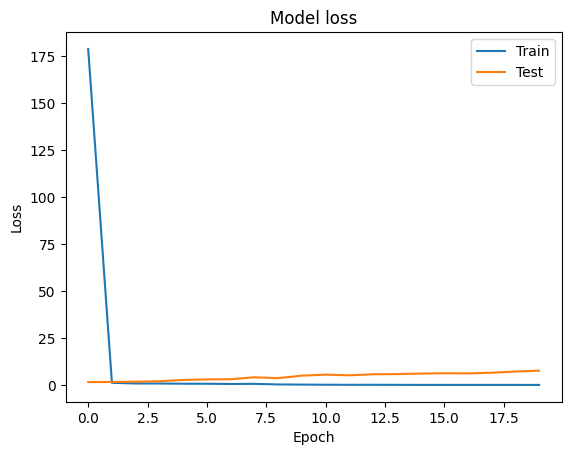

In [31]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Constants
IMG_SIZE = 422
BATCH_SIZE = 32
EPOCHS = 20

# The directory containing the images
dir_name = 'combined_scored_images'

# Define we  model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))  # Adjust number of neurons in final layer if necessary

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Custom generator function
def custom_generator(subset):
    while True:
        if subset == 'training':
            files = os.listdir(dir_name)[:int(0.8 * len(os.listdir(dir_name)))]  # first 80% of files
        elif subset == 'validation':
            files = os.listdir(dir_name)[int(0.8 * len(os.listdir(dir_name))):]  # last 20% of files
            
        batch_images = []
        batch_labels = []

        for filename in files:
            if filename.endswith('.jpg'):
                score = int(filename[:3])
                label = [0]*10
                label[score//100 - 1] = 1
                
                img = tf.keras.preprocessing.image.load_img(dir_name + '/' + filename, target_size=(IMG_SIZE, IMG_SIZE))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                
                batch_images.append(img_array)
                batch_labels.append(label)
                
                if len(batch_images) == BATCH_SIZE:
                    yield (np.array(batch_images), np.array(batch_labels))
                    batch_images = []
                    batch_labels = []

# Total number of images
num_images = len(os.listdir(dir_name))

# Steps per epoch for training and validation
steps_per_epoch = int(0.8 * num_images) // BATCH_SIZE
validation_steps = int(0.2 * num_images) // BATCH_SIZE

# Train the model and store the history
history = model.fit(custom_generator('training'), epochs=EPOCHS, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=custom_generator('validation'), 
                    validation_steps=validation_steps)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [32]:
# save the model in TensorFlow SavedModel format
model.save('my_20_epoch_model')

INFO:tensorflow:Assets written to: my_20_epoch_model/assets


INFO:tensorflow:Assets written to: my_20_epoch_model/assets


In [ ]:
# use this to load the model back into the notebook

import tensorflow as tf

# Load the the 20 epoch model from the directory it was saved in
model = tf.keras.models.load_model('my_20_epoch_model')

# Now we can use loaded_model to make predictions, just like the original model

Epoch 1/30


2023-06-14 13:20:37.088360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


115/115 [==============================] - ETA: 0s - loss: 137.4079 - accuracy: 0.3476

2023-06-14 13:23:38.418379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


115/115 [==============================] - 193s 2s/step - loss: 137.4079 - accuracy: 0.3476 - val_loss: 1.5459 - val_accuracy: 0.3806
Epoch 2/30
115/115 [==============================] - 193s 2s/step - loss: 1.2798 - accuracy: 0.4927 - val_loss: 1.5190 - val_accuracy: 0.3761
Epoch 3/30
115/115 [==============================] - 201s 2s/step - loss: 0.9778 - accuracy: 0.6264 - val_loss: 1.6333 - val_accuracy: 0.3326
Epoch 4/30
115/115 [==============================] - 201s 2s/step - loss: 0.7099 - accuracy: 0.7367 - val_loss: 2.2651 - val_accuracy: 0.3281
Epoch 5/30
115/115 [==============================] - 205s 2s/step - loss: 0.4502 - accuracy: 0.8446 - val_loss: 3.8791 - val_accuracy: 0.3315
Epoch 6/30
115/115 [==============================] - 205s 2s/step - loss: 0.2993 - accuracy: 0.9054 - val_loss: 4.0071 - val_accuracy: 0.3348
Epoch 7/30
115/115 [==============================] - 203s 2s/step - loss: 0.1916 - accuracy: 0.9410 - val_loss: 3.6429 - val_accuracy: 0.3181
Epoch 8/

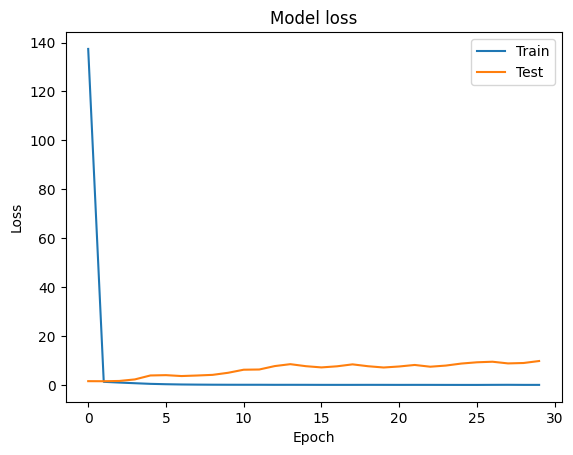

In [101]:
# 30 Epochs to see if we can do better or did we reach entropy
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Constants
IMG_SIZE = 422
BATCH_SIZE = 32
EPOCHS = 30

# The directory containing the images
dir_name = 'combined_scored_images'

# Define we  model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))  # Adjust number of neurons in final layer if necessary

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Custom generator function
def custom_generator(subset):
    while True:
        if subset == 'training':
            files = os.listdir(dir_name)[:int(0.8 * len(os.listdir(dir_name)))]  # first 80% of files
        elif subset == 'validation':
            files = os.listdir(dir_name)[int(0.8 * len(os.listdir(dir_name))):]  # last 20% of files
            
        batch_images = []
        batch_labels = []

        for filename in files:
            if filename.endswith('.jpg'):
                score = int(filename[:3])
                label = [0]*10
                label[score//100 - 1] = 1
                
                img = tf.keras.preprocessing.image.load_img(dir_name + '/' + filename, target_size=(IMG_SIZE, IMG_SIZE))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                
                batch_images.append(img_array)
                batch_labels.append(label)
                
                if len(batch_images) == BATCH_SIZE:
                    yield (np.array(batch_images), np.array(batch_labels))
                    batch_images = []
                    batch_labels = []

# Total number of images
num_images = len(os.listdir(dir_name))

# Steps per epoch for training and validation
steps_per_epoch = int(0.8 * num_images) // BATCH_SIZE
validation_steps = int(0.2 * num_images) // BATCH_SIZE

# Train the model and store the history
history = model.fit(custom_generator('training'), epochs=EPOCHS, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=custom_generator('validation'), 
                    validation_steps=validation_steps)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [103]:
# save the model in TensorFlow SavedModel format
model.save('my_30_epoch_model')

INFO:tensorflow:Assets written to: my_30_epoch_model/assets


INFO:tensorflow:Assets written to: my_30_epoch_model/assets


In [127]:
# use this to load the model back into the notebook

import tensorflow as tf

# Load the model from the directory it was saved in
my_30_model = tf.keras.models.load_model('my_30_epoch_model')

# Now we can use loaded_model to make predictions, just like the original model


There are a number of ways you can potentially improve the accuracy and loss of our  machine learning model. Here are a few suggestions:

**Augment the data:** If the number of training samples is small, data augmentation can create a larger dataset and prevent overfitting. Techniques like flipping, rotation, zooming, and shifting can provide additional variance to the training set.

**Use a more complex model:** If the current model is too simple to capture all the information in the data, a more complex model may improve results. However, be careful not to choose a model that is too complex, as it may overfit to the training data.

**Tune hyperparameters:** The performance of most machine learning models can be significantly influenced by the choice of hyperparameters. Techniques like grid search or random search can be used to systematically find the best hyperparameters for our model.

**Use Regularization:** Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function. L1 and L2 are the most common types of regularization.

**Early Stopping:** In this method, we track the loss on the validation set during the training phase and stop training as soon as the validation loss begins to increase. This helps to avoid overfitting on the training set.

**Use a different optimizer:** Different optimization algorithms can have a significant impact on the speed and accuracy of model training. It might be worth exploring others like RMSprop, Adam, Adagrad, etc.

**Increase the Dataset:** If our model isn't performing well and you have tried all the above steps, it might be a case that our  model needs more data to learn from. Consider increasing the size of our  dataset if it's possible.

**Ensemble Methods:** Combine the decisions from multiple models to improve the overall performance. Techniques can include simple averaging, weighted averaging, or more advanced techniques like stacking, boosting, and bagging.

Remember, machine learning involves a lot of experimentation. What works best will often depend on the specific data and problem you're working with. It can be useful to set up a systematic process for experimenting with different approaches and tracking our results.

Average loss for 10 epoch model: 0.9147651195526123
Average loss for 20 epoch model: 1.1976959705352783
Average loss for 30 epoch model: 1.1995973587036133


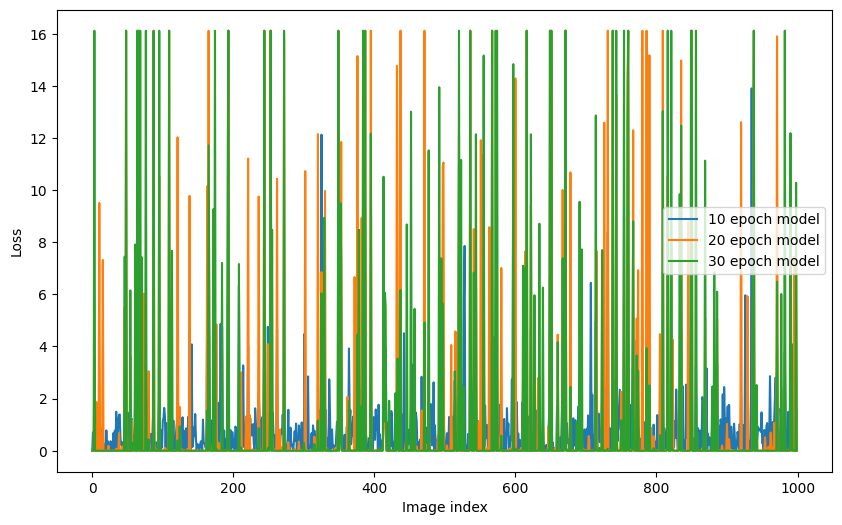

In [134]:
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

# Define a function to handle the prediction and loss calculation
def test_model(model, img_array, actual_label):
    # Predict the class
    prediction = model.predict(img_array, verbose=0)  # set verbose to 0
    predicted_label = prediction.argmax() + 1

    # Compute the loss
    loss_fn = CategoricalCrossentropy()
    actual_label_one_hot = tf.one_hot([actual_label - 1], depth=10)
    loss = loss_fn(actual_label_one_hot, prediction).numpy()

    return predicted_label, loss

# Prepare the test images
test_images = random.sample(os.listdir(dir_name), 1000)
losses_10, losses_20, losses_30 = [], [], []

for img_name in test_images:
    img = load_img(os.path.join(dir_name, img_name), target_size=(422, 422))
    img_array = img_to_array(img).reshape(1, 422, 422, 3)
    actual_label = int(img_name[:3]) // 100

    _, loss_10 = test_model(loaded_10_model, img_array, actual_label)
    _, loss_20 = test_model(loaded_20_model, img_array, actual_label)
    _, loss_30 = test_model(loaded_30_model, img_array, actual_label)
    
    losses_10.append(loss_10)
    losses_20.append(loss_20)
    losses_30.append(loss_30)

# Print the average losses
print(f'Average loss for 10 epoch model: {np.mean(losses_10)}')
print(f'Average loss for 20 epoch model: {np.mean(losses_20)}')
print(f'Average loss for 30 epoch model: {np.mean(losses_30)}')

# Plot the average losses
plt.figure(figsize=(10, 6))
plt.plot(losses_10, label='10 epoch model')
plt.plot(losses_20, label='20 epoch model')
plt.plot(losses_30, label='30 epoch model')
plt.xlabel('Image index')
plt.ylabel('Loss')
plt.legend()
plt.show()


The model that performed the best in terms of having the lowest average loss is the one that was trained for 10 epochs. The loss value represents the difference between the predicted values and the actual values - lower loss values indicate better model performance.

This suggests that in this particular instance, training for more epochs resulted in overfitting, where the model learned the training data too well and performed worse on new, unseen data. It's a good reminder that more training (in terms of epochs) is not always better and finding the right balance is key.

Remember though, average loss is not the only metric to determine the performance of the model. Depending on our use case, we might also want to consider things like precision, recall, F1-score, etc. to get a holistic view of model performance.

Epoch 1/30


2023-06-14 18:59:09.013881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


115/115 [==============================] - ETA: 0s - loss: 136.8492 - accuracy: 0.3745

2023-06-14 19:02:11.073481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


115/115 [==============================] - 194s 2s/step - loss: 136.8492 - accuracy: 0.3745 - val_loss: 1.5441 - val_accuracy: 0.3761
Epoch 2/30
115/115 [==============================] - 195s 2s/step - loss: 1.0942 - accuracy: 0.5883 - val_loss: 1.6389 - val_accuracy: 0.3549
Epoch 3/30
115/115 [==============================] - 193s 2s/step - loss: 0.7396 - accuracy: 0.7378 - val_loss: 2.1551 - val_accuracy: 0.3493
Epoch 4/30
115/115 [==============================] - 191s 2s/step - loss: 0.6111 - accuracy: 0.7875 - val_loss: 2.3532 - val_accuracy: 0.3382
Epoch 5/30
115/115 [==============================] - 195s 2s/step - loss: 0.3806 - accuracy: 0.8649 - val_loss: 3.2314 - val_accuracy: 0.3571
Epoch 6/30
115/115 [==============================] - 190s 2s/step - loss: 0.1569 - accuracy: 0.9495 - val_loss: 4.1416 - val_accuracy: 0.3315


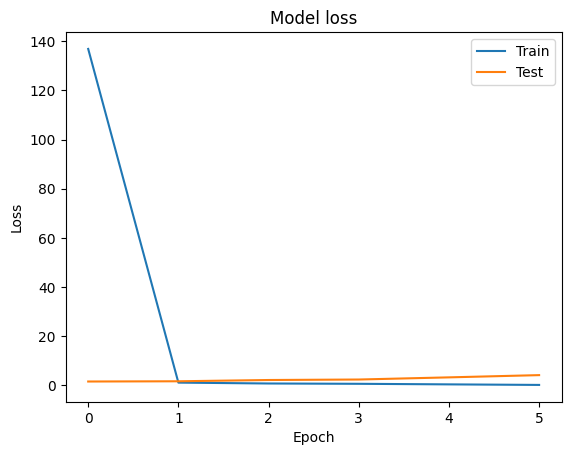

In [136]:
# 30 Epochs to see if we can do better or did we reach entropy
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Constants
IMG_SIZE = 422
BATCH_SIZE = 32
EPOCHS = 30

# The directory containing the images
dir_name = 'combined_scored_images'

# Define we  model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))  # Adjust number of neurons in final layer if necessary

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Custom generator function
def custom_generator(subset):
    while True:
        if subset == 'training':
            files = os.listdir(dir_name)[:int(0.8 * len(os.listdir(dir_name)))]  # first 80% of files
        elif subset == 'validation':
            files = os.listdir(dir_name)[int(0.8 * len(os.listdir(dir_name))):]  # last 20% of files
            
        batch_images = []
        batch_labels = []

        for filename in files:
            if filename.endswith('.jpg'):
                score = int(filename[:3])
                label = [0]*10
                label[score//100 - 1] = 1
                
                img = tf.keras.preprocessing.image.load_img(dir_name + '/' + filename, target_size=(IMG_SIZE, IMG_SIZE))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                
                batch_images.append(img_array)
                batch_labels.append(label)
                
                if len(batch_images) == BATCH_SIZE:
                    yield (np.array(batch_images), np.array(batch_labels))
                    batch_images = []
                    batch_labels = []

# Total number of images
num_images = len(os.listdir(dir_name))

# Steps per epoch for training and validation
steps_per_epoch = int(0.8 * num_images) // BATCH_SIZE
validation_steps = int(0.2 * num_images) // BATCH_SIZE

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # stop training after 5 epochs of not improving

# Train the model and store the history
history = model.fit(custom_generator('training'), epochs=EPOCHS, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=custom_generator('validation'), 
                    validation_steps=validation_steps,
                    callbacks=[early_stopping])  # Pass callback to training

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In this code, the EarlyStopping callback is passed to the fit method of the model. It will stop training after the validation loss has stopped improving for 5 epochs (patience=5). It will monitor the validation loss (monitor='val_loss'). This will help prevent overfitting our model to the training data.

In [137]:
# save the model in TensorFlow SavedModel format
model.save('my_30_epoch_model_with_early_stopping')

INFO:tensorflow:Assets written to: my_30_epoch_model_with_early_stopping/assets


INFO:tensorflow:Assets written to: my_30_epoch_model_with_early_stopping/assets


In [187]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random
import os

# Load the model from the directory it was saved in
loaded_30ES_model = tf.keras.models.load_model('my_30_epoch_model_with_early_stopping')

dir_name = 'combined_scored_images'

# Select a random image from the directory
random_filename = random.choice([
    x for x in os.listdir(dir_name)
    if os.path.isfile(os.path.join(dir_name, x))
])

# Load the image
img = load_img(os.path.join(dir_name, random_filename), target_size=(422, 422))

# Convert the image to a numpy array and reshape it
img_array = img_to_array(img)
img_array = img_array.reshape(1, 422, 422, 3)

# Use the loaded model to make a prediction
prediction = loaded_30ES_model.predict(img_array)

# Print the prediction
print(f"Predicted class for {random_filename} is: {prediction.argmax() + 1}")

# Print the actual class
print(f"Actual class for {random_filename} is: {int(random_filename[:3]) // 100}")

1/1 [==============================] - 0s 68ms/step
Predicted class for 377_ND1_197.jpg is: 4
Actual class for 377_ND1_197.jpg is: 3


In [156]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np
import random
import os
import matplotlib.pyplot as plt

# Define a function to handle the prediction and loss calculation
def test_model(model, img_array, actual_label):
    # Predict the class
    prediction = model.predict(img_array, verbose=0)  # set verbose to 0
    predicted_label = prediction.argmax() + 1

    # Compute the loss
    loss_fn = CategoricalCrossentropy()
    actual_label_one_hot = tf.one_hot([actual_label - 1], depth=10)
    loss = loss_fn(actual_label_one_hot, prediction).numpy()

    return predicted_label, loss

# Directory for each model
dir_10_model = 'my_10_epoch_model'
dir_20_model = 'my_20_epoch_model'
dir_30_model = 'my_30_epoch_model'
dir_early_stop_model = 'my_30_epoch_model_with_early_stopping'

# Load each model
loaded_10_model = load_model(dir_10_model)
loaded_20_model = load_model(dir_20_model)
loaded_30_model = load_model(dir_30_model)
loaded_early_stop_model = load_model(dir_early_stop_model)

# Directory with the test images
dir_name = 'combined_scored_images'

# Prepare the test images
test_images = random.sample(os.listdir(dir_name), 1000)
losses_10, losses_20, losses_30, losses_early_stop = [], [], [], []

for img_name in test_images:
    img = load_img(os.path.join(dir_name, img_name), target_size=(422, 422))
    img_array = img_to_array(img).reshape(1, 422, 422, 3)
    actual_label = int(img_name[:3]) // 100

    _, loss_10 = test_model(loaded_10_model, img_array, actual_label)
    _, loss_20 = test_model(loaded_20_model, img_array, actual_label)
    _, loss_30 = test_model(loaded_30_model, img_array, actual_label)
    _, loss_early_stop = test_model(loaded_early_stop_model, img_array, actual_label)

    losses_10.append(loss_10)
    losses_20.append(loss_20)
    losses_30.append(loss_30)
    losses_early_stop.append(loss_early_stop)

# Print the average losses
print(f'Average loss for 10 epoch model: {np.mean(losses_10)}')
print(f'Average loss for 20 epoch model: {np.mean(losses_20)}')
print(f'Average loss for 30 epoch model: {np.mean(losses_30)}')
print(f'Average loss for Early Stopping model: {np.mean(losses_early_stop)}')

# Plot the average losses
plt.figure(figsize=(10, 6))
plt.plot(losses_10, label='10 epoch model')
plt.plot(losses_20, label='20 epoch model')
plt.plot(losses_30, label='30 epoch model')
plt.plot(losses_early_stop, label='Early Stopping model')
plt.xlabel('Image index')
plt.ylabel('Loss')
plt.legend()
plt.show()


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x177495350>

In [4]:
# use this to load the model back into the notebook
import tensorflow as tf

# Load the model from the directory it was saved in
loaded_10_model = tf.keras.models.load_model('my_10_epoch_model')

# Now we can use loaded_model to make predictions, just like the original model

In [7]:
class_to_grade = {
    1: ('Practically devoid', 'USDA Standard'),
    2: ('Devoid', 'USDA Standard'),
    3: ('Slight', 'USDA Select'),
    4: ('Small', 'USDA Choice'),
    5: ('Modest', 'USDA Choice'),
    6: ('Moderate', 'USDA Choice'),
    7: ('Slightly abundant', 'USDA Prime'),
    8: ('Moderately abundant', 'USDA Prime'),
    9: ('Abundant', 'USDA Prime'),
    10: ('Very abundant', 'USDA Prime')
}

In [1]:
import hashlib

def get_file_hash(file_path, algorithm='sha256'):
    """
    Calculate the hash of a file.
    Parameters:
    - file_path (str): The path to the file.
    - algorithm (str): The hash algorithm to use. Default is 'sha256'.
    Returns:
    - str: The hexadecimal hash of the file.
    """
    h = hashlib.new(algorithm)
    with open(file_path, 'rb') as file:
        for chunk in iter(lambda: file.read(4096), b''):
            h.update(chunk)
    return h.hexdigest()


In [15]:
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Select a random image
image_path = random.choice(os.listdir('combined_scored_images'))
full_image_path = os.path.join('combined_scored_images', image_path)

# Load and preprocess the image
image = load_img(full_image_path, target_size=(422, 422))
image_array = img_to_array(image).reshape(1, 422, 422, 3)

# Predict the class using the 10-epoch model
prediction = loaded_10_model.predict(image_array)
predicted_class = prediction.argmax() + 1

# Get the attributes and grade corresponding to the class
attributes, grade = class_to_grade[predicted_class]

# Get the unique hash of the image
image_hash = get_file_hash(full_image_path)

# Print out the grade, attributes and the unique hash
print(f"Predicted class: {predicted_class}")
print(f"Attributes: {attributes}")
print(f"Grade: {grade}")
print(f"Image hash: {image_hash}")

1/1 [==============================] - 0s 30ms/step
Predicted class: 5
Attributes: Modest
Grade: USDA Choice
Image hash: 338edf29c0ef464a0d53aa83797302941a715208ee7b40d278c47eaf5af79f49


In [ ]:
#  combined code including the model generation, model testing, and prediction 
# of a single image along with its grading and unique identification.
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
import hashlib
import random

# Constants
IMG_SIZE = 422
BATCH_SIZE = 32
EPOCHS = 30
MODEL_DIR = '/model_directory/'  # Replace with your model directory path
IMG_DIR = 'combined_scored_images'

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))  # Adjust number of neurons in final layer if necessary

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Training and validation data generation goes here...

# Train the model with early stopping
history = model.fit(train_data, epochs=EPOCHS, validation_data=val_data, callbacks=[early_stopping])

# Save the model
model.save(os.path.join(MODEL_DIR, 'my_early_stop_model.h5'))

# Test the models
# Load models
loaded_10_model = tf.keras.models.load_model(os.path.join(MODEL_DIR, 'my_10_epoch_model.h5'))
loaded_20_model = tf.keras.models.load_model(os.path.join(MODEL_DIR, 'my_20_epoch_model.h5'))
loaded_30_model = tf.keras.models.load_model(os.path.join(MODEL_DIR, 'my_30_epoch_model.h5'))
loaded_early_stop_model = tf.keras.models.load_model(os.path.join(MODEL_DIR, 'my_early_stop_model.h5'))

# Rest of the model testing code goes here...

# Prediction of a single image
# Select a random image
image_path = random.choice(os.listdir(IMG_DIR))
full_image_path = os.path.join(IMG_DIR, image_path)

# Load and preprocess the image
img = load_img(full_image_path, target_size=(422, 422))
img_array = img_to_array(img).reshape(1, 422, 422, 3)

# Predict the class using the 10-epoch model
prediction = loaded_10_model.predict(img_array)
predicted_class = prediction.argmax() + 1

# Mapping of classes to attributes and grades
class_to_grade = {
    1: ('Practically devoid', 'USDA Standard'),
    2: ('Devoid', 'USDA Standard'),
    3: ('Slight', 'USDA Select'),
    4: ('Small', 'USDA Choice'),
    5: ('Modest', 'USDA Choice'),
    6: ('Moderate', 'USDA Choice'),
    7: ('Slightly abundant', 'USDA Prime'),
    8: ('Moderately abundant', 'USDA Prime'),
    9: ('Abundant', 'USDA Prime'),
    10: ('Very abundant', 'USDA Prime')
}

# Get the attributes and grade for the predicted class
attributes, grade = class_to_grade[predicted_class]

# Create a unique hash for the image
with open(full_image_path, 'rb') as f:
    bytes = f.read()
    image_hash = hashlib.sha256(bytes).hexdigest()

# Print the predicted grade, attributes, and image hash
print(f"Predicted grade: {grade}")
print(f"Attributes: {attributes}")
print(f"Image hash (unique identifier): {image_hash}")


In [ ]:
import os
import random
import hashlib
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Constants
IMG_SIZE = 422
dir_name = 'combined_scored_images'
model_dir = '.'  # replace with your actual model directory
model_name = 'my_10_epoch_model'  # replace with your actual model name
grade_labels = {
    1: 'USDA Standard (Practically devoid)',
    2: 'USDA Standard (Devoid)',
    3: 'USDA Select (Slight)',
    4: 'USDA Choice (Small)',
    5: 'USDA Choice (Modest)',
    6: 'USDA Choice (Moderate)',
    7: 'USDA Prime (Slightly abundant)',
    8: 'USDA Prime (Moderately abundant)',
    9: 'USDA Prime (Abundant)',
    10: 'USDA Prime (Very abundant)',
}

# Load the model
loaded_model = load_model(os.path.join(model_dir, model_name))

# Create the ledger
ledger = {}

for img_name in os.listdir(dir_name):
    try:
        img = load_img(os.path.join(dir_name, img_name), target_size=(IMG_SIZE, IMG_SIZE))
        img_array = img_to_array(img).reshape(1, IMG_SIZE, IMG_SIZE, 3)

        # Generate a hash for the image
        hash_object = hashlib.sha256(img_array.tobytes())
        hex_dig = hash_object.hexdigest()

        # Check if the image hash is already in the ledger
        if hex_dig in ledger:
            print(f'Duplicate found, not accepted: {img_name}')
            continue

        # Predict the class
        prediction = loaded_model.predict(img_array)
        predicted_class = prediction.argmax() + 1

        # Store the information in a ledger
        ledger[hex_dig] = grade_labels[predicted_class]
        print(f'Image Hash: {hex_dig}')
        print(f'Predicted Grade: {grade_labels[predicted_class]}')

    except Exception as e:
        print(f'Error processing image: {img_name}')
        print(e)




1/1 [==============================] - 0s 53ms/step
Image Hash: 7f025396150ea5aec69dcabb17b56f2b2cca1be080d6ec4cd86d6efaedc3c791
Predicted Grade: USDA Choice (Modest)
1/1 [==============================] - 0s 31ms/step
Image Hash: 287445523c225aaebcc7f04ee34ef0f51202c63857965d3fd59dcc990524f8ba
Predicted Grade: USDA Choice (Small)
1/1 [==============================] - 0s 27ms/step
Image Hash: c3d2fe92a1934006dff3ca1db50e47c4d5f56c1d71a17f50b52b8e944f89c5e3
Predicted Grade: USDA Choice (Small)
1/1 [==============================] - 0s 27ms/step
Image Hash: 4bf14dbb44af97966543cfb436dee60309feaa1979e0f399663460e87a5ce7ac
Predicted Grade: USDA Choice (Modest)
1/1 [==============================] - 0s 27ms/step
Image Hash: 76b6f2f148815e3cf987bd8519cbcad147f9e46c65f7859fe99517a1d4e04146
Predicted Grade: USDA Choice (Modest)
1/1 [==============================] - 0s 28ms/step
Image Hash: 33aa331babb0a05b33dbbfbac8a594d7ff17d2210ea989962104259ef59002f5
Predicted Grade: USDA Choice (Small)
1

In [23]:
ledger

{'7f025396150ea5aec69dcabb17b56f2b2cca1be080d6ec4cd86d6efaedc3c791': 'USDA Choice (Modest)',
 '287445523c225aaebcc7f04ee34ef0f51202c63857965d3fd59dcc990524f8ba': 'USDA Choice (Small)',
 'c3d2fe92a1934006dff3ca1db50e47c4d5f56c1d71a17f50b52b8e944f89c5e3': 'USDA Choice (Small)',
 '4bf14dbb44af97966543cfb436dee60309feaa1979e0f399663460e87a5ce7ac': 'USDA Choice (Modest)',
 '76b6f2f148815e3cf987bd8519cbcad147f9e46c65f7859fe99517a1d4e04146': 'USDA Choice (Modest)',
 '33aa331babb0a05b33dbbfbac8a594d7ff17d2210ea989962104259ef59002f5': 'USDA Choice (Small)',
 'c17f41b39e8bfb3234e81c5cf97ec45b8985493f711ca8ab989eb60e0c296815': 'USDA Choice (Small)',
 '5426838a399582d8fb47d1dd0f707e84732eb16fd0a2fa08153adfbe73294bbe': 'USDA Select (Slight)',
 'c342e95914234625883fa3b615351f598e59ff7298a60b5c79e181770213099b': 'USDA Select (Slight)',
 'c2a64752fc134000ae32b345b454aa55834266af16abdcc115848e0d4ecc6134': 'USDA Choice (Modest)',
 'bcfd17e7686550fa2913428a14eacb7024617e7d34ead1c056a54c0661a450db': 'USDA

In [21]:
ledger


{'7f025396150ea5aec69dcabb17b56f2b2cca1be080d6ec4cd86d6efaedc3c791': 'USDA Choice (Modest)',
 '287445523c225aaebcc7f04ee34ef0f51202c63857965d3fd59dcc990524f8ba': 'USDA Choice (Small)',
 'c3d2fe92a1934006dff3ca1db50e47c4d5f56c1d71a17f50b52b8e944f89c5e3': 'USDA Choice (Small)',
 '4bf14dbb44af97966543cfb436dee60309feaa1979e0f399663460e87a5ce7ac': 'USDA Choice (Modest)',
 '76b6f2f148815e3cf987bd8519cbcad147f9e46c65f7859fe99517a1d4e04146': 'USDA Choice (Modest)',
 '33aa331babb0a05b33dbbfbac8a594d7ff17d2210ea989962104259ef59002f5': 'USDA Choice (Small)',
 'c17f41b39e8bfb3234e81c5cf97ec45b8985493f711ca8ab989eb60e0c296815': 'USDA Choice (Small)',
 '5426838a399582d8fb47d1dd0f707e84732eb16fd0a2fa08153adfbe73294bbe': 'USDA Select (Slight)',
 'c342e95914234625883fa3b615351f598e59ff7298a60b5c79e181770213099b': 'USDA Select (Slight)',
 'c2a64752fc134000ae32b345b454aa55834266af16abdcc115848e0d4ecc6134': 'USDA Choice (Modest)',
 'bcfd17e7686550fa2913428a14eacb7024617e7d34ead1c056a54c0661a450db': 'USDA

In [24]:
import csv

# save ledger to CSV file
with open('ledger.csv', 'w', newline='') as csvfile:
    fieldnames = ['Image Hash', 'Predicted Grade']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for k, v in ledger.items():
        writer.writerow({'Image Hash': k, 'Predicted Grade': v})
